# Homework 10: Inference in SLR and MLR 
***

**Name**: CJ Kennedy


***

This assignment is due on Canvas by **6:00PM on Friday November 18**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

Here are some imports for this assignment:

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import numpy as np 
from scipy import stats
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
%matplotlib inline


# Problem 1
***

The business of programming is exploding in growth! As a programmer, it is important to lead a well rounded life and take care of your health. We are going to look at a data set of a sample of programmers, their overall happiness and some possible influences on their happiness.

Load `happiness.csv` as a dataframe called `dfHappy` and take a look at the data.

In [2]:
# Upload here and take a look at some of the data, .head(10) perhaps.
dfHappy = pd.read_csv("happiness.csv") 
dfHappy

,Index,happiness,grmsSgr,sunlight,screentime,BMI,ff
0,1,3.427723,52.984804,41.800653,148.656740,22.770203,53
1,2,5.381479,17.620582,83.681961,67.486945,18.965722,52
2,3,4.568705,33.145561,79.765209,83.085792,25.827328,48
3,4,1.560355,68.313223,39.734337,190.733508,19.102485,24
4,5,3.057388,53.587157,51.657807,113.854519,24.970149,2
...,...,...,...,...,...,...,...
493,494,3.615471,36.992055,47.187444,70.128951,29.971171,33
494,495,4.503108,30.354613,75.486438,64.889782,26.983803,28
495,496,4.932410,26.464581,92.557959,92.642327,30.257586,57
496,497,2.923684,50.745018,52.529465,106.825846,25.004673,27


### Data description:

***Index***: This is just a number listing the ID of the programmer.

***happiness***: This is the measured happiness of the programmer on a scale from 0 to 7.

***grmsSgr***: This variable measures the grams of sugar intake per day.

***BMI***: This variable is the body mass index of the individual.

***screentime***: This variable measures the daily minutes of screentime that the programmer put in on a specified day. Some are low due to that day being a research, or field day, and some are high due to that day being a coding day.

***sunlight***: This variable measures the number of minutes taken during the day to be outdoors.

***ff***: This variable measures, on a scale from 0=none to 100=immediate, access to friends and family as a support system with the programmers particular job location. 

### What affects Happiness?

We are attempting to ascertain things that affect happiness. In problem 1 this will be done with Simple Linear Regression.

Determine the affect of each predictor variable in $\color{red}{\textbf{5 steps}}$: 

$\color{red}{\textbf{1]}}$: Make a scatter plot of predictor variable versus response variable. 

$\color{red}{\textbf{2]}}$: Come up with the regression line for the relationship.

Create the same scatterplot (from Step 1) with the line of best-fit imposed on it, $\textbf{AND}$ print the actual equation along with each graph.

That is, fit and $\textbf{print}$ a linear regression model to the data of the form 

$$
Y_i = \alpha + \beta x_i \quad \textrm{for } i=1,2, \ldots, 498 
$$

$\color{red}{\textbf{3]}}$: Find a measure for the goodness of fit of the regression line.

Explain what $R^2$ means in this case.

$\color{red}{\textbf{4]}}$: Create a $99\%$ confidence interval for the slope ($\beta$) of the regression line.

From step 2, notice the $\beta$ for the happiness relationship with sugar.

Explain your results: Is your $\beta$ statistic in the confidence interval? Is 0 included in the interval? 


$\color{red}{\textbf{5]}}$: For the relationship that you think you have discovered, the question is whether its really the case or if the downward/upward trend should be attributed to chance.

Perform a hypothesis test at the $\alpha = 0.01$ significance level to determine if the observed relationship between the predictor and the response is real by testing the hypotheses: 

$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$

$\color{blue}{\text{Explain your results}}$: Is there sufficient evidence to conclude that the observed relationship between the predictor and the response happiness is real? Answer with a p-value argument. Complete each step even if you find no legitimate linear relationship between variables. So, your answer ($\color{blue}{\text{p-value argument}}$) should take into account that we ARE making (without checking) the assumptions below:


### Assumptions

To begin with, we will assume all the $\color{blue}{\text{proper conditions}}$ for doing inference on slope:

-- $\color{blue}{\text{Linear}}$: The relationship between the independent variable and the dependent variable is linear.

-- $\color{blue}{\text{Independence}}$: The noise/errors are independent.

-- $\color{blue}{\text{Normal}}$: The errors are normally distributed.

-- $\color{blue}{\text{Equal Variance}}$: Homoscedastic errors.

-- $\color{blue}{\text{Random}}$: Random errors; unbiased.


### Here are some hints/formulas that may help you:

You may want to use `.max()` and `.min()` in order to find appropriate bounds for each scatterplot.

You may want to do some calculations without using canned functions. Here are some useful formulas:

$\hat{y}=\hat{a}+\hat{b}\cdot x$

$SSE = \sum{(y-\hat{y})^2}$

$\hat{\sigma^2} = \frac{SSE}{n-2}$

$SE_{\beta}=\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}$

$t_{\hat{\beta}}=\frac{\hat{\beta}-\beta}{\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}}$

$\text{p-value} = 2\cdot \text{CDF}(t_{\hat{\beta}}, n-2)$

$\color{blue}{\text{(25 points) }}$ ***Perform the $\color{red}{\text{5-steps}}$ mentioned above for $\textbf{EACH}$ predictor variable.*** 

***Complete each of the 5 steps mentioned above with a title (such as those below, but replace the question mark of course) and also create any extra needed cells for coding and explanations.***



### Predictor variable = grmsSgr, Step 1.

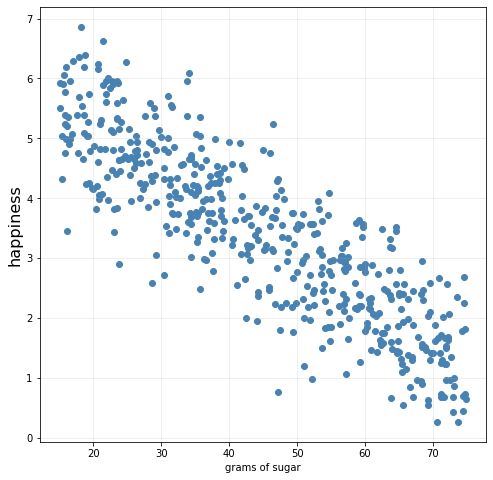

In [3]:
variable = dfHappy[["grmsSgr"]]
y = dfHappy["happiness"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(variable, y, color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("grams of sugar", fontsize=10); axes.set_ylabel("happiness", fontsize=16);

### Predictor variable = grmsSgr, Step2.

Fitted Model: Y = 6.58116 + -0.07138x


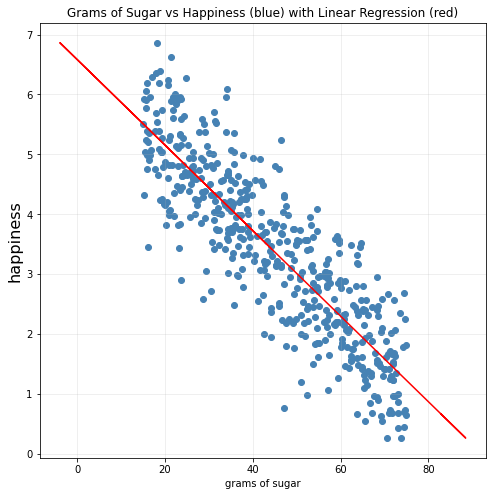

In [4]:
# adapted from nb21
bhat1, ahat, rval, pval, stderr = stats.linregress(dfHappy["grmsSgr"], dfHappy["happiness"])
  # bhat1 is slope. I am calling it bhat1 instead of bhat due to double use later on.
  # ahat is y-intercept
  # rval is correlation coefficient
  # pval is the p-value for slope
  # stderr is the standard error for slope CI
print("Fitted Model: Y = {:.5f} + {:.5f}x".format(ahat, bhat1))
# graphing
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(dfHappy["grmsSgr"], dfHappy["happiness"], color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("grams of sugar", fontsize=10)
axes.set_ylabel("happiness", fontsize=16);
x = (y-ahat)/bhat1
axes.plot(x,y,'r',label='Linear Regression Model')
axes.set_title("Grams of Sugar vs Happiness (blue) with Linear Regression (red)");

### Predictor variable = grmsSgr, Step3.

In [5]:
print("correlation coefficient = {}".format(rval))
print("or R^2 = {}".format(rval**2))
print("The coefficient of determination is a measure of how well the regression line estimates the actual data points.")
print("In this case, the coefficient is negative which indicates a decreasing relationship.")

correlation coefficient = -0.8655564052844625
or R^2 = 0.7491878907289607
The coefficient of determination is a measure of how well the regression line estimates the actual data points.
In this case, the coefficient is negative which indicates a decreasing relationship.


### Predictor Variable = grmsSgr, Step4.

In [6]:
#adapted from nb21
L_CI = (bhat1 - stats.t.ppf(0.995, len(x)-2) * stderr)
U_CI = (bhat1 + stats.t.ppf(0.995, len(x)-2) * stderr)
print("99% CI = [{:.3f}, {:.3f}], CI width = {:.3f}".format(L_CI, U_CI, U_CI - L_CI))
print("The B stat",np.round(bhat1,4),"is included in the interval and 0 is not included in the interval")
print("So, zero is not reasonable value for the B stat and a relationship between the variables is present.")

99% CI = [-0.076, -0.067], CI width = 0.010
The B stat -0.0714 is included in the interval and 0 is not included in the interval
So, zero is not reasonable value for the B stat and a relationship between the variables is present.


### Predictor variable = grmsSgr, Step5.

In [7]:
# adapted from nb21
Tb = (bhat1-0)/stderr
print("test statistic Tb = {}".format(Tb))
tpval = 2*(stats.t.cdf(Tb, df=len(x)-2))
print("p-value = {}".format(tpval))

test statistic Tb = -38.491245353793545
p-value = 4.5167037984356374e-151


Adapted from nb21: Since the p-value $4.51*10^{-151}$ is less than $\alpha = 0.01$ we reject the null hypothesis and conclude that there is sufficient statistical evidence that $\beta \neq 0$ and the relationship between the feature and $\color{red}{\text{response is real}}$.

Consuming more grams of sugar daily is correlated with lower happiness rates.

Every additional gram of sugar consumed results in a reduction of 0.07 units of happiness. A somewhat noticable effect.

### Predictor variable = sunlight, Step 1.

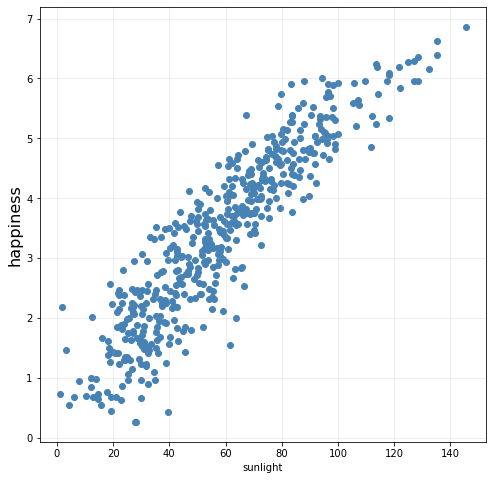

In [8]:
variable = dfHappy[["sunlight"]]
y = dfHappy[["happiness"]]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(variable, y, color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("sunlight", fontsize=10); axes.set_ylabel("happiness", fontsize=16);

### Predictor variable = sunlight, Step2.

Fitted Model: Y = 0.57330 + 0.04828x


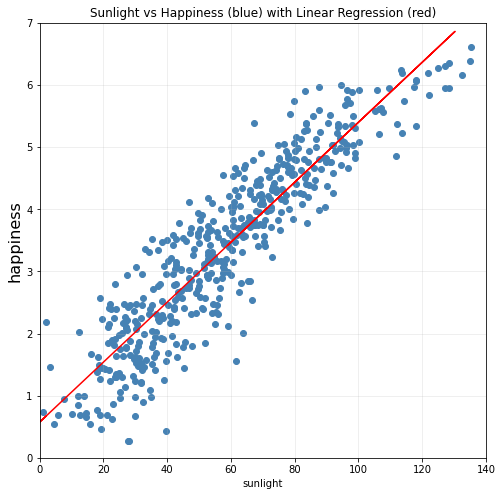

In [9]:
# adapted from nb21
bhat1, ahat, rval, pval, stderr = stats.linregress(dfHappy["sunlight"], dfHappy["happiness"])
print("Fitted Model: Y = {:.5f} + {:.5f}x".format(ahat, bhat1))
# graphing
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(dfHappy["sunlight"], dfHappy["happiness"], color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("sunlight", fontsize=10)
axes.set_ylabel("happiness", fontsize=16);
axes.set_xlim([0, 140])
axes.set_ylim([0, 7])
x = (y-ahat)/bhat1
axes.plot(x,y,'r')
axes.set_title("Sunlight vs Happiness (blue) with Linear Regression (red)");

### Predictor variable = sunlight, Step3.

In [10]:
print("correlation coefficient = {}".format(rval))
print("or R^2 = {}".format(rval**2))
print("The coefficient is positive which indicates an increasing relationship.")

correlation coefficient = 0.9132596802111487
or R^2 = 0.8340432434993695
The coefficient is positive which indicates an increasing relationship.


### Predictor Variable = sunlight, Step4.

In [11]:
#adapted from nb21
L_CI = (bhat1 - stats.t.ppf(0.995, len(x)-2) * stderr)
U_CI = (bhat1 + stats.t.ppf(0.995, len(x)-2) * stderr)
print("99% CI = [{:.3f}, {:.3f}], CI width = {:.3f}".format(L_CI, U_CI, U_CI - L_CI))
print("The B stat",np.round(bhat1,4),"is included in the interval and 0 is not included in the interval")
print("So, zero is not reasonable value for the B stat and a relationship between the variables may be present.")

99% CI = [0.046, 0.051], CI width = 0.005
The B stat 0.0483 is included in the interval and 0 is not included in the interval
So, zero is not reasonable value for the B stat and a relationship between the variables may be present.


### Predictor variable = sunlight, Step5.

In [12]:
# adapted from nb21
Tb = (bhat1-0)/stderr
print("test statistic Tb = {}".format(Tb))
tpval = 2*(stats.t.cdf(Tb, df=len(x)-2))
print("p-value = {}".format(tpval))

test statistic Tb = 49.927250880494924
p-value = 2.0


Adapted from nb21: Since the p-value $2$ is greater than $\alpha = 0.01$ we reject the null hypothesis and conclude that there is not sufficient statistical evidence that $\beta \neq 0$ and the relationship between the feature and $\color{red}{\text{response is real}}$.

Consuming more/less sunlight is not correlated with lower happiness rates.


### Predictor variable = screentime, Step 1.

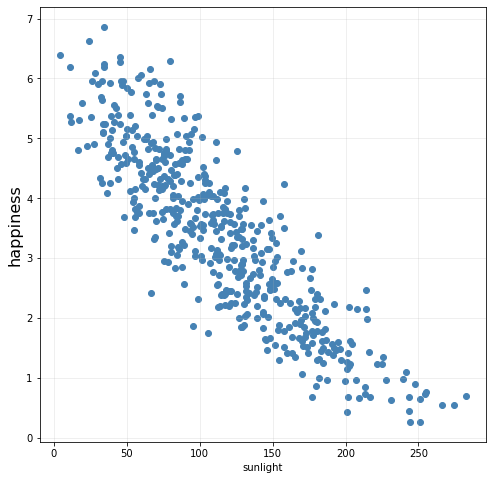

In [13]:
variable = dfHappy[["screentime"]]
y = dfHappy[["happiness"]]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(variable, y, color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("sunlight", fontsize=10); axes.set_ylabel("happiness", fontsize=16);

### Predictor variable = screentime, Step2.

Fitted Model: Y = 6.04112 + -0.02306x


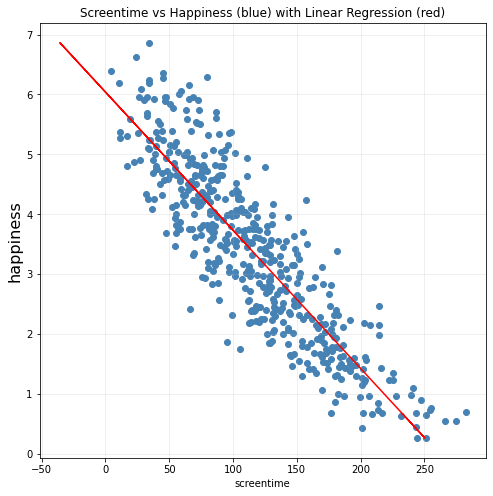

In [14]:
# adapted from nb21
bhat1, ahat, rval, pval, stderr = stats.linregress(dfHappy["screentime"], dfHappy["happiness"])
print("Fitted Model: Y = {:.5f} + {:.5f}x".format(ahat, bhat1))
# graphing
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(dfHappy["screentime"], dfHappy["happiness"], color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("screentime", fontsize=10)
axes.set_ylabel("happiness", fontsize=16);
x = (y-ahat)/bhat1
axes.plot(x,y,'r')
axes.set_title("Screentime vs Happiness (blue) with Linear Regression (red)");

### Predictor variable = screentime, Step3.

In [15]:
print("correlation coefficient = {}".format(rval))
print("or R^2 = {}".format(rval**2))
print("The coefficient is negative which indicates a decreasing relationship.")

correlation coefficient = -0.8750453121696081
or R^2 = 0.765704298350007
The coefficient is negative which indicates a decreasing relationship.


### Predictor Variable = screentime, Step4.

In [16]:
#adapted from nb21
L_CI = (bhat1 - stats.t.ppf(0.995, len(x)-2) * stderr)
U_CI = (bhat1 + stats.t.ppf(0.995, len(x)-2) * stderr)
print("99% CI = [{:.3f}, {:.3f}], CI width = {:.3f}".format(L_CI, U_CI, U_CI - L_CI))
print("The B stat",np.round(bhat1,4),"is included in the interval and 0 is not included in the interval")

99% CI = [-0.025, -0.022], CI width = 0.003
The B stat -0.0231 is included in the interval and 0 is not included in the interval


### Predictor variable = screentime, Step5.

Adapted from nb21: Since the p-value $2*10^{-158} $ is less than $\alpha = 0.01$ we reject the null hypothesis and conclude that there sufficient statistical evidence that $\beta \neq 0$ and the relationship between the feature and $\color{red}{\text{response is real}}$.

More screetime daily is correlated with lower happiness rates.

Every additional minute of screetime results in a reduction of 0.023 units of happiness. A somewhat noticable effect.

### Predictor variable = BMI, Step 1.

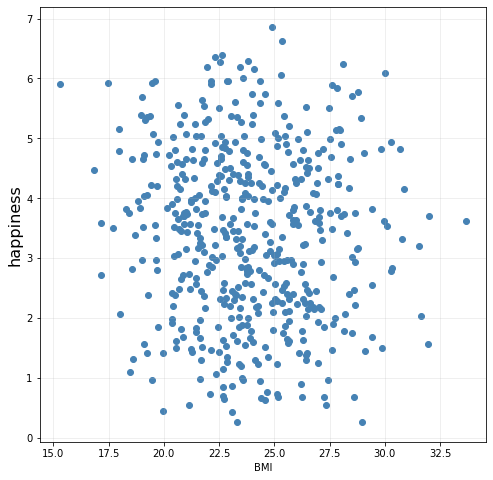

In [17]:
variable = dfHappy[["BMI"]]
y = dfHappy[["happiness"]]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(variable, y, color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("BMI", fontsize=10)
axes.set_ylabel("happiness", fontsize=16);

### Predictor variable = BMI, Step2.

Fitted Model: Y = 4.26156 + -0.03641x


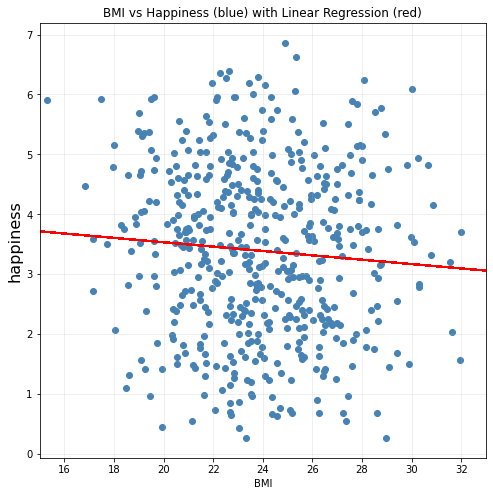

In [18]:
# adapted from nb21
bhat1, ahat, rval, pval, stderr = stats.linregress(dfHappy["BMI"], dfHappy["happiness"])
  # bhat1 is slope. 
  # ahat is y-intercept
  # rval is correlation coefficient
  # pval is the p-value for slope
  # stderr is the standard error for slope CI
print("Fitted Model: Y = {:.5f} + {:.5f}x".format(ahat, bhat1))
# graphing
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(dfHappy["BMI"], dfHappy["happiness"], color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("BMI", fontsize=10)
axes.set_ylabel("happiness", fontsize=16);
x = (y-ahat)/bhat1
axes.plot(x,y,'r')
axes.set_xlim([15, 33])
axes.set_title("BMI vs Happiness (blue) with Linear Regression (red)");

### Predictor variable = BMI, Step3.

In [19]:
print("correlation coefficient = {}".format(rval))
print("or R^2 = {}".format(rval**2))
print("The coefficient is negative which indicates a decreasing relationship.")

correlation coefficient = -0.07571271330775824
or R^2 = 0.005732414956422792
The coefficient is negative which indicates a decreasing relationship.


### Predictor Variable = BMI, Step4.

In [20]:
#adapted from nb21
L_CI = (bhat1 - stats.t.ppf(0.995, len(x)-2) * stderr)
U_CI = (bhat1 + stats.t.ppf(0.995, len(x)-2) * stderr)
print("99% CI = [{:.3f}, {:.3f}], CI width = {:.3f}".format(L_CI, U_CI, U_CI - L_CI))
print("The B stat",np.round(bhat1,4),"is included in the interval and 0 IS included in the interval")
print("Thus, there is strong evidence that there is not a ‘significant’ correlation between BMI and happiness.")

99% CI = [-0.092, 0.019], CI width = 0.111
The B stat -0.0364 is included in the interval and 0 IS included in the interval
Thus, there is strong evidence that there is not a ‘significant’ correlation between BMI and happiness.


### Predictor variable = BMI, Step5.

In [21]:
# adapted from nb21
Tb = (bhat1-0)/stderr
print("test statistic Tb = {}".format(Tb))
tpval = 2*(stats.t.cdf(Tb, df=len(x)-2))
print("p-value = {}".format(tpval))

test statistic Tb = -1.6910560715471123
p-value = 0.09145428934378726


Adapted from nb21: Since the p-value $.09 $ is greater than $\alpha = 0.01$ we do not reject the null hypothesis and conclude that there not sufficient statistical evidence that $\beta \neq 0$ and the relationship between the feature and $\color{red}{\text{response is not real}}$.

A higher BMI is not correlated to a higher or lower happiness level.

### Predictor variable = ff, Step 1.

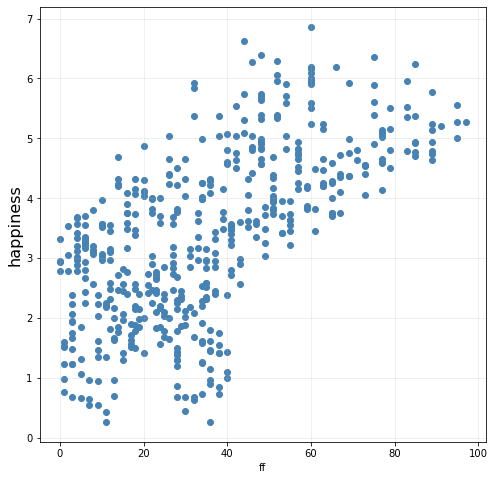

In [22]:
variable = dfHappy[["ff"]]
y = dfHappy[["happiness"]]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(variable, y, color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("ff", fontsize=10); axes.set_ylabel("happiness", fontsize=16);

### Predictor variable = ff, Step2.

Fitted Model: Y = 1.96365 + 0.04000x


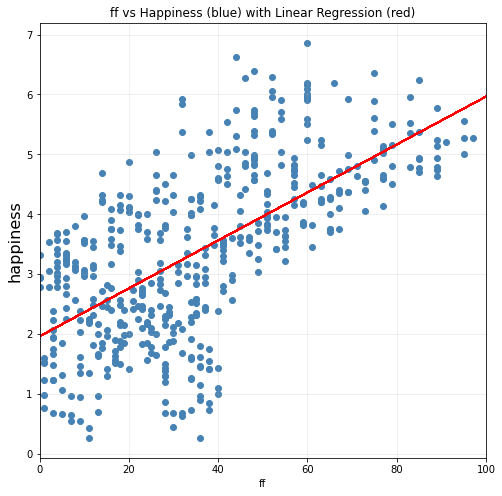

In [23]:
# adapted from nb21
bhat1, ahat, rval, pval, stderr = stats.linregress(dfHappy["ff"], dfHappy["happiness"])
print("Fitted Model: Y = {:.5f} + {:.5f}x".format(ahat, bhat1))
# graphing
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(dfHappy["ff"], dfHappy["happiness"], color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("ff", fontsize=10)
axes.set_ylabel("happiness", fontsize=16);
x = (y-ahat)/bhat1
axes.plot(x,y,'r')
axes.set_xlim([0, 100])
axes.set_title("ff vs Happiness (blue) with Linear Regression (red)");

### Predictor variable = ff, Step3.

In [24]:
print("correlation coefficient = {}".format(rval))
print("or R^2 = {}".format(rval**2))
print("The coefficient is positive which indicates an increasing relationship.")

correlation coefficient = 0.643738158044878
or R^2 = 0.4143988161230123
The coefficient is positive which indicates an increasing relationship.


### Predictor Variable = ff, Step4.

In [25]:
#adapted from nb21
L_CI = (bhat1 - stats.t.ppf(0.995, len(x)-2) * stderr)
U_CI = (bhat1 + stats.t.ppf(0.995, len(x)-2) * stderr)
print("99% CI = [{:.3f}, {:.3f}], CI width = {:.3f}".format(L_CI, U_CI, U_CI - L_CI))
print("The B stat",np.round(bhat1,4),"is included in the interval and 0 is not included in the interval")

99% CI = [0.034, 0.046], CI width = 0.011
The B stat 0.04 is included in the interval and 0 is not included in the interval


### Predictor variable = ff, Step5.

In [26]:
# adapted from nb21
Tb = (bhat1-0)/stderr
print("test statistic Tb = {}".format(Tb))
tpval = 2*(stats.t.cdf(Tb, df=len(x)-2))
print("p-value = {}".format(tpval))

test statistic Tb = 18.734802459537597
p-value = 2.0


Adapted from nb21: Since the p-value $2$ is greater than $\alpha = 0.01$ we do not reject the null hypothesis and conclude that there not sufficient statistical evidence that $\beta \neq 0$ and the relationship between the feature and $\color{red}{\text{response is not real}}$.

A higher ff is not correlated to a higher or lower happiness level.

# Problem 2

Instead of looking at each individual predictor, fit a multiple linear regression model to the happiness data.

## Part A

***(4 points)*** Use `model = sm.OLS(y, X).fit()` to find the estimated parameters and based on these parameters estimated by the model, replace the unknown $\hat{\beta}_j$ parameters below with the actual values in the model.

$$
\texttt{happiness} = \text{constant} + \beta_{sugar} \times \texttt{grmsSgr} + \beta_{BMI} \times \texttt{BMI} + \beta_{screen} \times \texttt{screentime} + \beta_{sun}\times \texttt{sunlight} + \beta_{ff}\times \texttt{ff}
$$


In [27]:
# adapted from nb22
# Collect the features (independent variables) in a 2D array. 
X = dfHappy[["grmsSgr", "BMI", "screentime","sunlight","ff"]]
# Add a constant to the 'X' array for the intecept. 
X = sm.add_constant(X)
# Collect the response (Dependent variable) data in an array.
y = dfHappy["happiness"]
MLRmodel = sm.OLS(y, X).fit()
print(MLRmodel.params)

const         4.027108
grmsSgr      -0.021068
BMI          -0.007613
screentime   -0.008401
sunlight      0.022160
ff            0.004445
dtype: float64


$\color{red}{\text{Solution for Part A, the model is...:}}$

$$
\texttt{happiness} =  \color{blue}{4.027} \color{red}{- 0.0211} \times \texttt{grmsSgr} \color{red}{- 0.0076} \times \texttt{BMI} \color{red}{-0.0084} \times \texttt{screentime} \color{red}{+ 0.022}\times \texttt{sunlight} \color{red}{+ 0.0044}\times \texttt{ff}
$$

### Part B

***(3 points)*** According to a p-value argument, should we discard any predictor variables?

To answer this, run `model.summary()` to check the validity of your $\beta_j$ coefficients, i.e. check to see if a given predictor variable can be eliminated from the model due to its non-relationship with the response variable, and name that variable in your solution.

In [28]:
# Code here:
# call for a summary of the MLR model
print(MLRmodel.summary())
print("Given the predictor variables t and P > |t| results, we eliminate:")
print("BMI")

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1310.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          1.20e-281
Time:                        01:09:50   Log-Likelihood:                -222.53
No. Observations:                 498   AIC:                             457.1
Df Residuals:                     492   BIC:                             482.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0271      0.201     20.044      0.0

$\color{red}{\text{Solution for Part B:}}$


### Part C

***(3 points)*** Which two variables have the strongest influence on happiness?

$\color{red}{\text{Solution for Part C:}}$

The two variables with the largest effect on happiness are $\textbf{grams of sugar}$ consumed and $\textbf{sunlight}$ received.

### Part D

***(6 points)*** Find any colinearity issues in this model and create three graphs for the three biggest offending variables to get a visual of the colinearity.

In [29]:
# Code here:
res = dfHappy[["grmsSgr", "BMI", "screentime","sunlight","ff"]].corr()
print(res)
print("The largest colinearity issues were with the 3 variables: grmsSgr, sunlight, and screentime.")

             grmsSgr       BMI  screentime  sunlight        ff
grmsSgr     1.000000  0.070208    0.749181 -0.788105 -0.556069
BMI         0.070208  1.000000    0.029886 -0.067274 -0.058958
screentime  0.749181  0.029886    1.000000 -0.777234 -0.539554
sunlight   -0.788105 -0.067274   -0.777234  1.000000  0.613576
ff         -0.556069 -0.058958   -0.539554  0.613576  1.000000
The largest colinearity issues were with the 3 variables: grmsSgr, sunlight, and screentime.


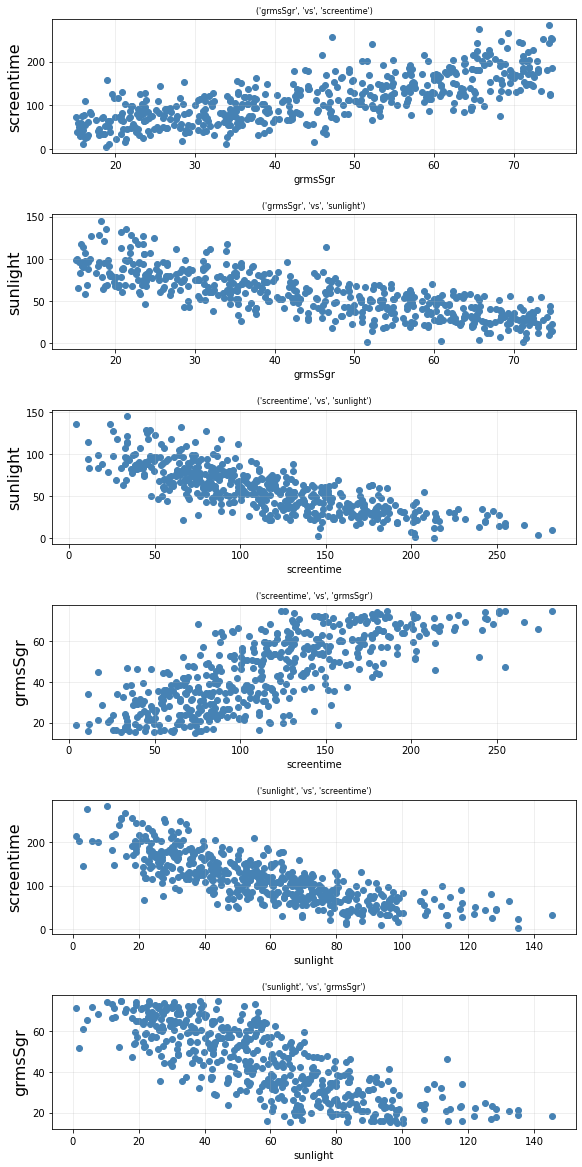

In [30]:
#Code here adapted from nb22
# Datatype info: 'variables' is a list.
variables = dfHappy[["grmsSgr", "screentime","sunlight"]]
# Notice this is a 9 by 1 display.
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8,16))
fig.tight_layout(h_pad=4)
# Create a for-loop that will create all three scatter plots.
# 'enumerate' returns an index number and the element in requested list.
# 'axi' holds the index number, and 'm' holds the element from the list 'media'.
m = ["grmsSgr", "screentime","sunlight"]
m2 = ["screentime","sunlight","grmsSgr"]
axi = 0
ind1 = 0; ind2 = 0;
for i in range(0,2): # grams of sugar vs ... graphs
    axes[axi].scatter(dfHappy[m[ind1]], dfHappy[m2[ind2]], color="steelblue")
    axes[axi].grid(alpha=0.25)
    axes[axi].set_xlabel(m[ind1], fontsize=10)
    axes[axi].set_ylabel(m2[ind2], fontsize=16)
    axes[axi].set_title((m[ind1], "vs" ,m2[ind2]), fontsize=8); 
    axi = axi + 1; ind2 = ind2 + 1;
ind1 = 1; ind2 = 1;
for i in range(0,2): # screentime vs ... graphs
    axes[axi].scatter(dfHappy[m[ind1]], dfHappy[m2[ind2]], color="steelblue")
    axes[axi].grid(alpha=0.25)
    axes[axi].set_xlabel(m[ind1], fontsize=10)
    axes[axi].set_ylabel(m2[ind2], fontsize=16)
    axes[axi].set_title((m[ind1], "vs" ,m2[ind2]), fontsize=8); 
    axi = axi + 1; ind2 = ind2 + 1;
ind1 = 2; ind2 = 0;
m2 = ["screentime","grmsSgr"]
for i in range(0,2): # sunlight vs ... graphs
    axes[axi].scatter(dfHappy[m[ind1]], dfHappy[m2[ind2]], color="steelblue")
    axes[axi].grid(alpha=0.25)
    axes[axi].set_xlabel(m[ind1], fontsize=10)
    axes[axi].set_ylabel(m2[ind2], fontsize=16)
    axes[axi].set_title((m[ind1], "vs" ,m2[ind2]), fontsize=8); 
    axi = axi + 1; ind2 = ind2 + 1;

### Part E

***(4 points)*** Simplify the model by eliminating variables with colinearity. Choose one variable with the strongest affect on happiness and provide an SLR model. What would the linear regression model be?

Fitted Model: Y = 6.58116 + -0.07138x


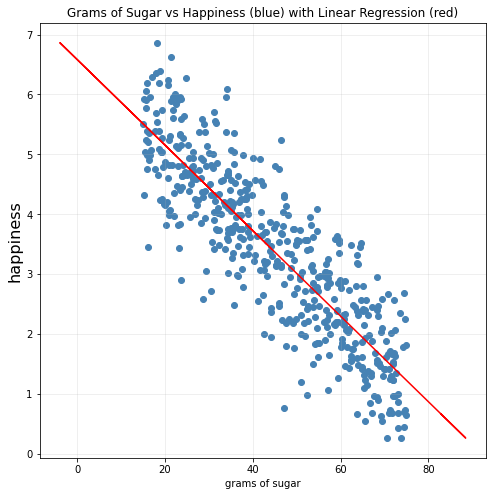

In [31]:
#X = dfHappy[["grmsSgr"]]
#X = sm.add_constant(X)
#y = dfHappy["happiness"]
#MLRmodel = sm.OLS(y, X).fit()
#MLRmodel.summary()
variable = dfHappy[["grmsSgr"]]
y = dfHappy["happiness"]
bhat1, ahat, rval, pval, stderr = stats.linregress(dfHappy["grmsSgr"], dfHappy["happiness"])
print("Fitted Model: Y = {:.5f} + {:.5f}x".format(ahat, bhat1))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(dfHappy["grmsSgr"], dfHappy["happiness"], color="steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("grams of sugar", fontsize=10)
axes.set_ylabel("happiness", fontsize=16);
x = (y-ahat)/bhat1
axes.plot(x,y,'r',label='Linear Regression Model')
axes.set_title("Grams of Sugar vs Happiness (blue) with Linear Regression (red)");

That is, we say for every additional gram of sugar consumed, there is a reduction in 0.07138 "units" of happiness.

### Rubric Check
***
***(5 points)*** Make sure your answers are thorough but not redundant. Explain your answers, don't just put a number. Make sure you have matched your questions on Gradescope. Make sure your PDF is correct and your LaTeX is correct. etc. etc. BE NEAT.

***
# End of assignment
***

# OPTIONAL (Just for fun)

*** $\color{red}{\text{No work to be done here}}$. This is just some code to play with if you are interested.***

                            OLS Regression Results                            
Dep. Variable:               sunlight   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2493.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          1.42e-195
Time:                        01:09:51   Log-Likelihood:                -1902.2
No. Observations:                 498   AIC:                             3808.
Df Residuals:                     496   BIC:                             3817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2119      1.274     -0.166      0.8

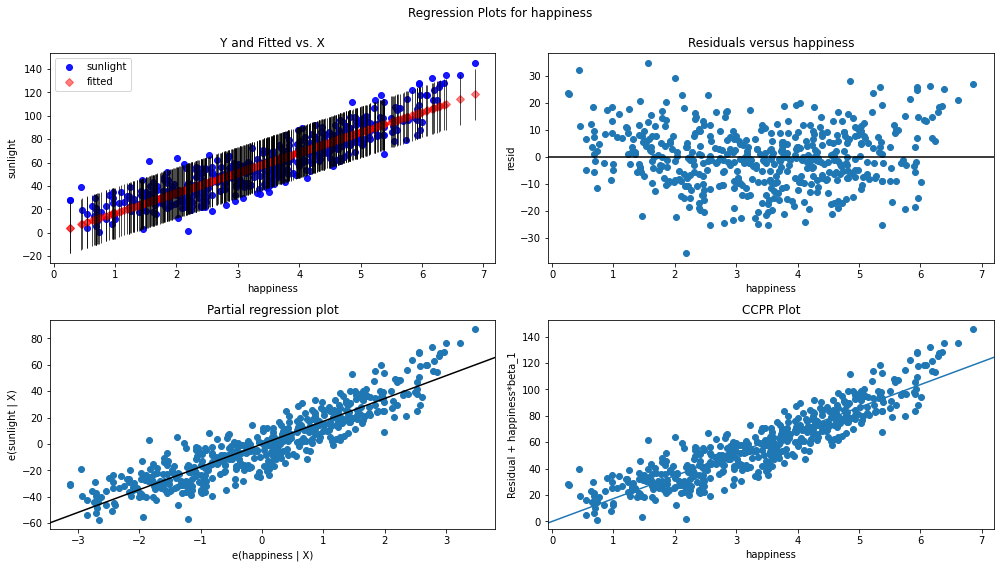

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# fit simple linear regression model
linear_model = ols('sunlight ~ happiness',
                   data=dfHappy).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    'happiness',
                                    fig=fig)